In [124]:
from utilities import plot_counts_and_proportion

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline 

# quality plots
SAVEFIGS = True

## Data read

Since train identity table is considerably shorter than train transaction table, and merging them will result in a incredibly high ratio of NANs then we have decided to just use transaction table.

In [2]:
folder_path = '../input/'

# Train
train_transaction = pd.read_csv(f'{folder_path}train_transaction.csv', nrows=30000)
X, y = train_transaction.drop('isFraud', axis=1), train_transaction['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Submission
submission_transaction = pd.read_csv(f'{folder_path}test_transaction.csv', nrows=2500)
# sub = pd.read_csv(f'{folder_path}sample_submission.csv')
# train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')

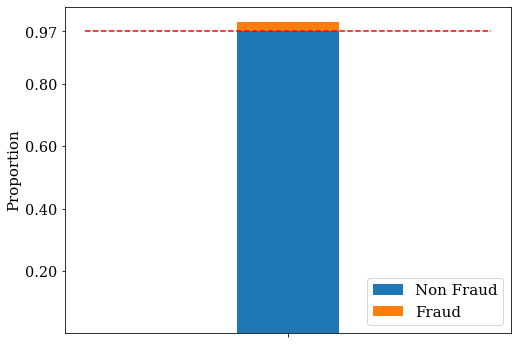

In [80]:
plt.figure(figsize=(8, 6))
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-large')
plt.rc('ytick', labelsize='x-large')

N = 1
ind = np.arange(1) 
prop = train_transaction['isFraud'].value_counts(normalize=True)
width = .5
p1 = plt.bar(ind, (.97, 0), width)
p2 = plt.bar(ind, (.03, 0), width,
             bottom=(.97, 0))
plt.xticks(ind, (' '))
plt.yticks((.2, .4, .6, .8, .97))

plt.hlines(y=.97, xmin=-1, xmax=1, colors='r', linestyles='dashed')



plt.ylabel('Proportion', fontsize=15)
plt.legend((p1[0], p2[0]), ('Non Fraud', 'Fraud'), loc=4, prop={'size':15})

plt.savefig('./imgs/created/fraud_prop.png')

In [103]:
categorical_vars = set(['ProductCD', *[f'card{i}' for i in range(1,7)],
                   *[f'M{i}' for i in range(1,10)],
                     'P_emaildomain', 'R_emaildomain', 'addr1', 'addr2'])

continuous_vars = X_train.columns.difference(categorical_vars)

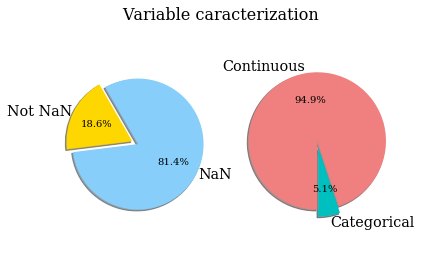

In [123]:
# Data to plot
fig = plt.figure()
fig.suptitle('Variable caracterization', fontsize=16)

#Plot 1
ax1 = plt.subplot(1,2,1)
labels = 'Not NaN', 'NaN'
sizes = [X_train.shape[1] -1 - X_train.isna().any(axis=0).sum(), X_train.isna().any(axis=0).sum()]
colors = ['gold', 'lightskyblue']#, 'lightcoral', 'lightskyblue']
explode = (0.1, 0)#, 0, 0)  # explode 1st slice

# ax1.set_title('Missing data')
ax1.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=120, labeldistance=1.02)
ax1.axis('equal')


# Plot 2


ax2 = plt.subplot(1,2,2)
# ax2.set_title('Type variable')
labels = 'Categorical', 'Continuous'
sizes = [len(categorical_vars), len(continuous_vars)]
colors2 = ['c', 'lightcoral']
ax2.pie(sizes, explode=explode, labels=labels, colors=colors2,
autopct='%1.1f%%', shadow=True, startangle=-90, labeldistance=1.1)
ax2.axis('equal')

fig.savefig('./imgs/created/vars_carac.png')

## Explotarion categorical



So card6 is type of card, card4 is credit card company


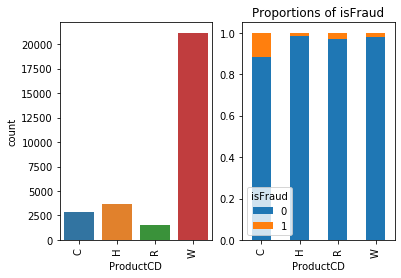

In [14]:
fig = plot_counts_and_proportion(train_transaction, x="ProductCD", hue="isFraud", savefig=SAVEFIGS)

The product code C directly raises the probability of Fraud

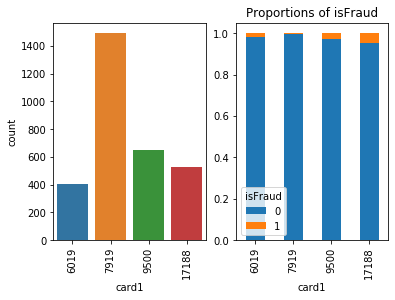

In [15]:
fig = plot_counts_and_proportion(train_transaction, x="card1", hue="isFraud", savefig=SAVEFIGS)

The card1 in 7919 greatly reduces the probability of Fraud.

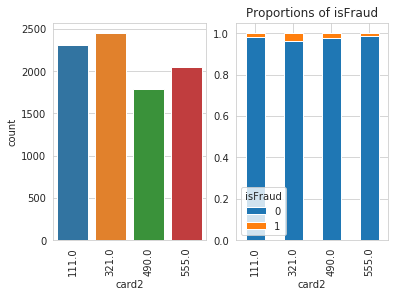

In [19]:
fig = plot_counts_and_proportion(train_transaction, x="card2", hue="isFraud", savefig=SAVEFIGS)

card 2 has no apparent effect in probability of fraud

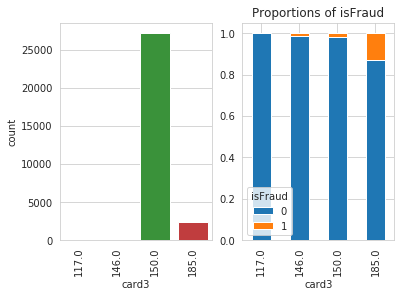

In [20]:
fig = plot_counts_and_proportion(train_transaction, x="card3", hue="isFraud", savefig=SAVEFIGS)

card 3 in 185 has apparent effect in probability of fraud

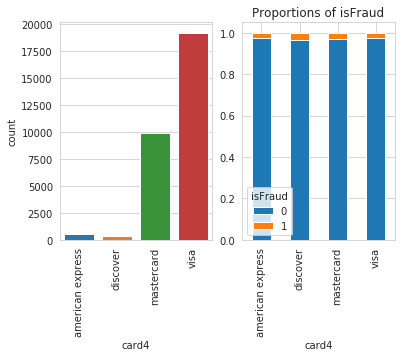

In [21]:
fig = plot_counts_and_proportion(train_transaction, x="card4", hue="isFraud", savefig=SAVEFIGS)

card 4 has no apparent effect in probability of fraud

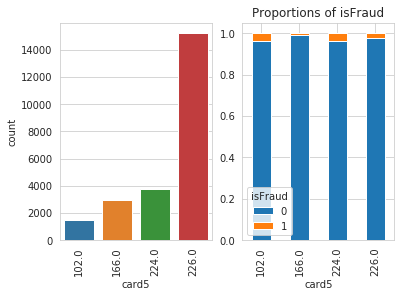

In [22]:
fig = plot_counts_and_proportion(train_transaction, x="card5", hue="isFraud", savefig=SAVEFIGS)

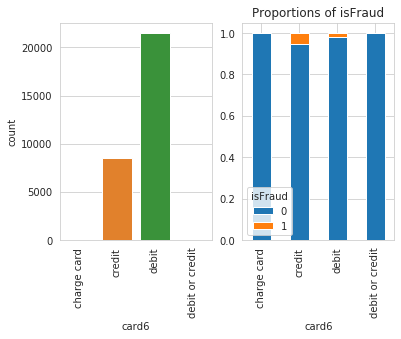

In [23]:
fig = plot_counts_and_proportion(train_transaction, x="card6", hue="isFraud", savefig=SAVEFIGS)

### Continuous vars